## Example of plotting pressure-latitude cross section with topography masking
### Wenwen Kong
### Date: May 17, 2020, Sunday
### Datasource: ERA-5

In [2]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from netCDF4 import Dataset
import numpy as np
import xarray
import pandas as pd
import cartopy.crs as ccrs


## Define a function for pressure-latitude cross-section plot: plotyz

In [3]:
def plotyz(datayz, lat, lev, titlestr, vmin_in, vmax_in, ncolors, unit, includewind, wind):
    
    fig, ax = plt.subplots(figsize=(20,15))
    
    lats, levs = np.meshgrid(lat, lev) 
    
    levels=np.linspace(vmin_in, vmax_in, ncolors)   # number of color intervals
    pcm = ax.contourf(lats, levs, datayz, levels, cmap='seismic')
    
    plt.title(titlestr, fontsize=15, weight='bold')
    plt.gca().invert_yaxis()
    plt.xlabel('latitude', fontsize=15, weight='bold')
    plt.ylabel('pressure', fontsize=15, weight='bold')
    plt.grid()
    
    cbar = fig.colorbar(pcm, orientation='horizontal', shrink=1., extend='both')
    cbar.ax.set_xlabel(unit, fontsize=15, weight='bold')
    cbar.ax.tick_params(labelsize=15)
    
    # overlay wind contours
    if includewind == True:
        levels=np.linspace(-50, 50, 11)
        CS=ax.contour(lats, levs, wind, levels, colors='k')
        ax.clabel(CS, fontsize=9, iline=1, fmt='%0.1f') 
    return

## Read in the data
### Note: the orography data is universial

In [13]:
filepath = './'
filename = 'era5_1979_june_z_u_v_1000mbto100mb.nc'

# Note: the below data contains surface geopotential values (i.e. elevation * g)
filetopo = 'era5_1979_june_orography.nc'

# Load in data of u, v, z
nc       = Dataset(filepath+filename,'r')
# Load in data of elevation 
nc_topo  = Dataset(filepath+filetopo,'r')

u        = nc.variables['u'][0,:,:,:]
v        = nc.variables['v'][0,:,:,:]
z        = nc.variables['z'][0,:,:,:]
topo     = nc_topo.variables['z'][0,:,:]

# Masking when surface geopotential (related to topography) is greater than geopotential at any level
uu       = xarray.where(z <= topo, np.nan, u)
vv       = xarray.where(z <= topo, np.nan, v)

# Subste uu and vv
lats     = nc.variables['latitude'][:]
lons     = nc.variables['longitude'][:]
plev     = nc.variables['level'][:]
print(plev)

# get the indices of lat1 = 10N, lat2 = 30N
lat1     = 10. # south bound at 10N
lat2     = 35. # north bound at 30N
lat1_index = np.squeeze(np.where(lats == lat1))
lat2_index = np.squeeze(np.where(lats == lat2))
lats_sub = lats[lat2_index:lat1_index]
print(lats_sub.shape)

# get the index of lon == 90E
lon      = 95
lon_index= np.squeeze(np.where(lons == lon))

uwnd     = uu[:,lat2_index:lat1_index,lon_index]
vwnd     = vv[:,lat2_index:lat1_index,lon_index]
print(uwnd.shape)
print(vwnd.shape)

[ 100  125  150  175  200  225  250  300  350  400  450  500  550  600
  650  700  750  775  800  825  850  875  900  925  950  975 1000]
(100,)
(27, 100)
(27, 100)


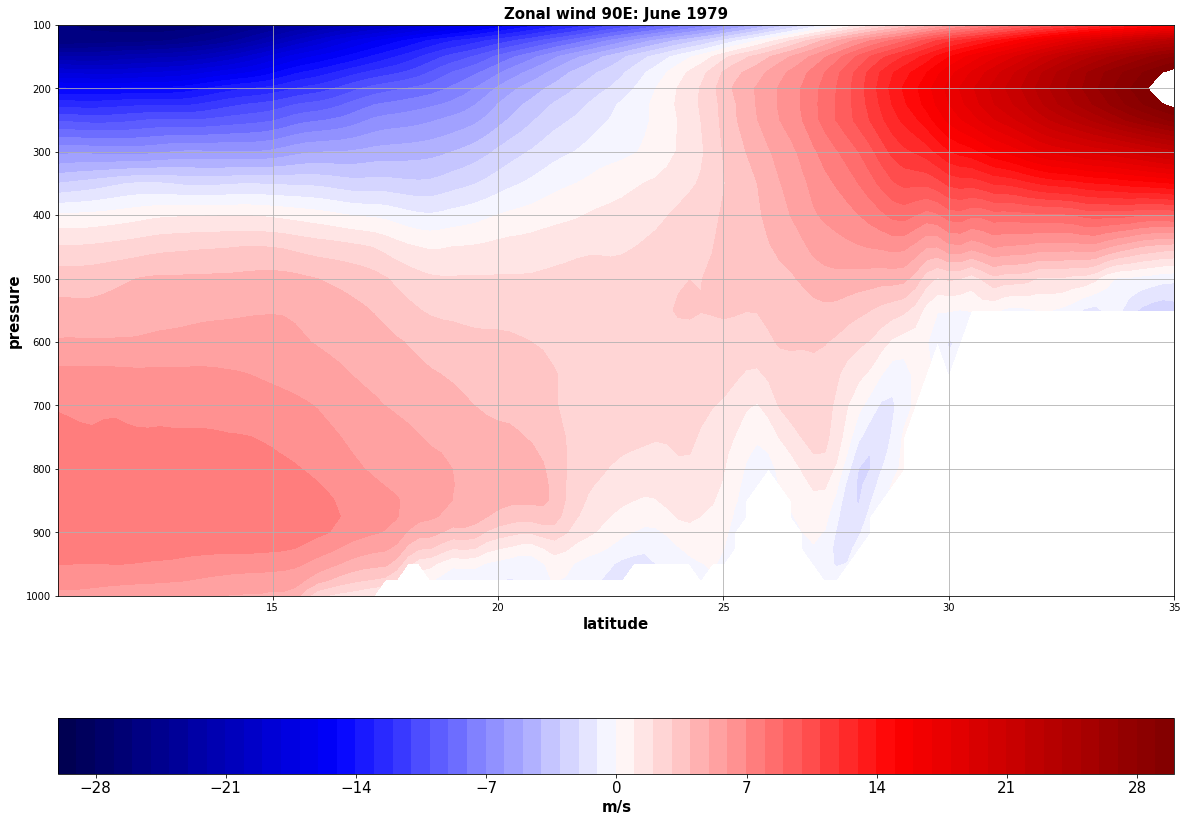

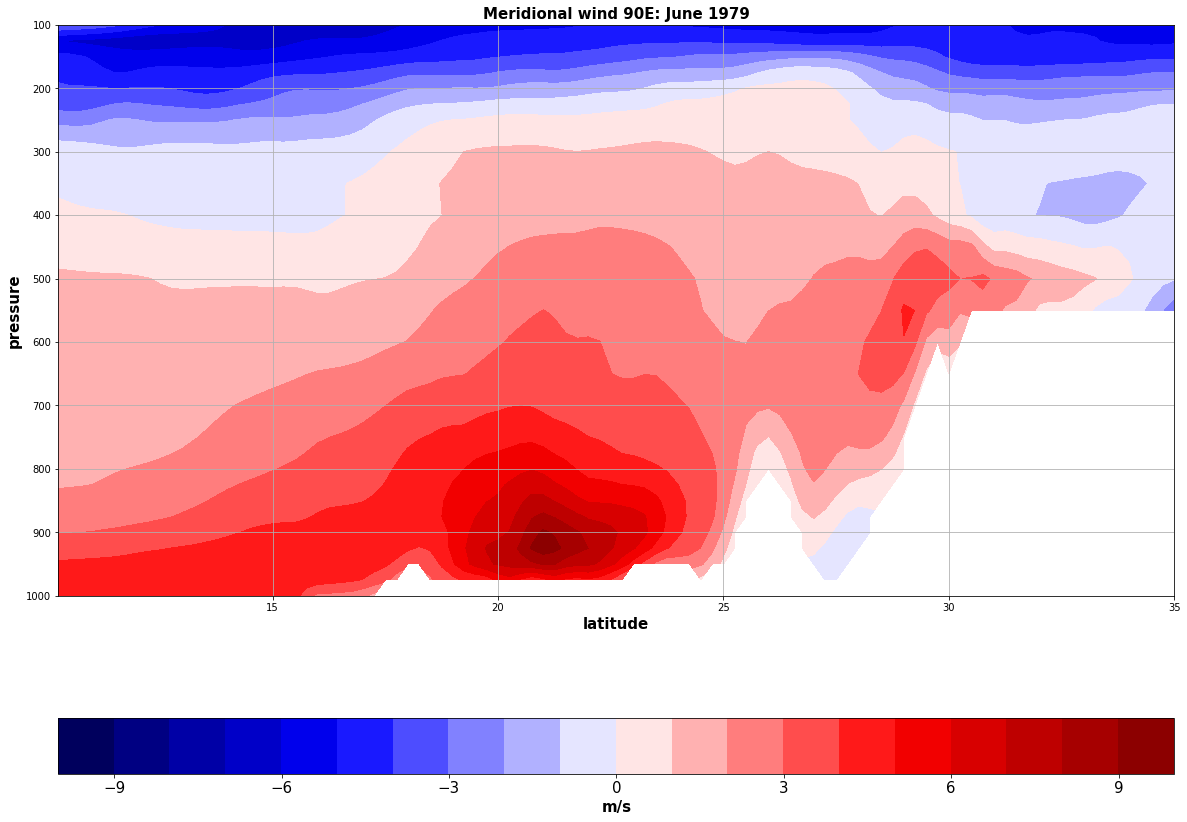

In [15]:
plotyz(uwnd, lats_sub, plev, 'Zonal wind 90E: June 1979', 
       vmin_in = -30., vmax_in = 30., ncolors = 61, unit = 'm/s',
       includewind=False, wind=uwnd)

plotyz(vwnd, lats_sub, plev, 'Meridional wind 90E: June 1979', 
       vmin_in = -10., vmax_in = 10., ncolors = 21, unit = 'm/s',
       includewind=False, wind=vwnd)